In [445]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [446]:
train = pd.read_csv("train.csv")
train['train_set'] = 1

test = pd.read_csv("test.csv")
test['train_set'] = 0
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_set    891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [447]:
train = train.drop(columns=['PassengerId'])  #passenger id wont help our model.

numerical_columns = list(train.select_dtypes(include=['int64', 'float64']).columns)
categorical_columns = list(train.select_dtypes(include=['object']).columns)

### 1. Exploratory Data Analysis ###

1. Wealth is a predictor of survival rate? How can we estimate Wealth (ideas: fare, class cabinin, title...)
2. Age is a predictor of survival rate? Explore age column and compare mortality
3. Gender is a predictor of survival rate? Explore gender column and compare mortality

#### 1.1. Exploring Wealth and it's relation to Survival Rate ####

In [448]:
#exploring wealth and its relation with survival rate

wealth_columns = ['Pclass', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived', 'Sex']
#Some answers we want: embarked local has something to do with wealth? and the Cabin? How is the tickets organized? 

wealth_df = train[wealth_columns]

##### 1.1.1. PClass  #####

Upper classes have more chance of survival

In [449]:
pclass_distribution = pd.DataFrame(wealth_df.groupby(['Pclass', 'Sex'])['Sex'].value_counts())
pclass_distribution_mortality = wealth_df.groupby(['Pclass', 'Sex'])['Survived'].mean()

pclass_distribution['Mortality Rate'] = pclass_distribution_mortality
pclass_distribution


count  Mortality Rate
Pclass Sex                          
1      female     94        0.968085
       male      122        0.368852
2      female     76        0.921053
       male      108        0.157407
3      female    144        0.500000
       male      347        0.135447

##### 1.1.2. Fare  #####

Bigger fare means more chance of survival

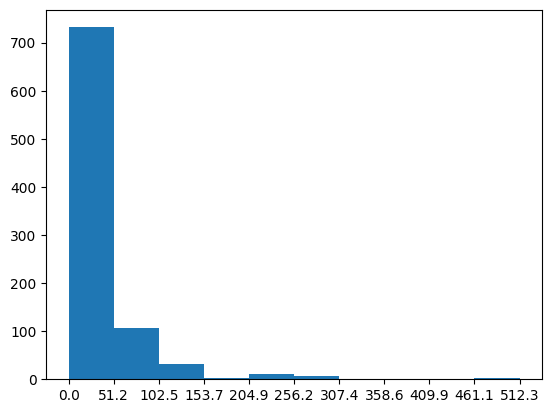

In [450]:
bins = plt.hist(wealth_df['Fare'])[1]
labels = ['fare' + str(i) for i in np.arange(len(bins) - 1)]

plt.xticks(bins)
plt.show()



In [451]:
wealth_df['Fare-cat'] = pd.cut(wealth_df['Fare'], bins=bins, labels=labels)
fare_df = pd.DataFrame(wealth_df.groupby(['Fare-cat','Sex'])['Sex'].value_counts())
fare_df['Survived'] = wealth_df.groupby(['Fare-cat', 'Sex'])['Survived'].mean()

fare_df
#as we can see, survival rate increases with money spent on the trip.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5420\4206991698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wealth_df['Fare-cat'] = pd.cut(wealth_df['Fare'], bins=bins, labels=labels)


count  Survived
Fare-cat Sex                    
fare0    female    227  0.665198
         male      490  0.165306
fare1    female     53  0.943396
         male       53  0.377358
fare2    female     20  0.900000
         male       11  0.454545
fare3    female      2  1.000000
         male        0       NaN
fare4    female      7  1.000000
         male        4  0.000000
fare5    female      4  1.000000
         male        2  0.000000
fare6    female      0       NaN
         male        0       NaN
fare7    female      0       NaN
         male        0       NaN
fare8    female      0       NaN
         male        0       NaN
fare9    female      1  1.000000
         male        2  1.000000

##### 1.2.3. Cabin #####

Here, something interesting occurred: certain cabins have a low survival rate, regardless of the passenger class. For instance, cabins with 'A' as the initial letter contain only first-class passengers, yet exhibit a low survival rate. Why does this phenomenon occur? It could be attributed to the cabin's location. We will look further by investigating Embarked Column.

However, cabins appear to be arranged in a particular order, with the majority of upper-class passengers occupying cabins associated with the earliest letters of the alphabet.

In [452]:

pd.set_option('display.max_rows', None)
#first letter of the cabins: maybe its related to health 
wealth_df['Cabin'].unique()   
first_letters = [str(element[0]) for element in wealth_df['Cabin'].unique()[1:]]
first_letters = list(set(first_letters))

#creating a column with the first letter of the passenger
wealth_df['Cabin-cat'] = wealth_df['Cabin'].str[0]

#trying to seek any relation with cabin, wealth and survival rate 
cabin_df = pd.DataFrame(wealth_df.groupby(['Cabin-cat', 'Pclass'])['Pclass'].value_counts())
cabin_df['Survived'] = wealth_df.groupby(['Cabin-cat', 'Pclass'])['Survived'].mean()
cabin_df



C:\Users\Usuario\AppData\Local\Temp\ipykernel_5420\3335250012.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wealth_df['Cabin-cat'] = wealth_df['Cabin'].str[0]


count  Survived
Cabin-cat Pclass                 
A         1          15  0.466667
B         1          47  0.744681
C         1          59  0.593220
D         1          29  0.758621
          2           4  0.750000
E         1          25  0.720000
          2           4  0.750000
          3           3  1.000000
F         2           8  0.875000
          3           5  0.200000
G         3           4  0.500000
T         1           1  0.000000

In [453]:
cabin_cat_count = pd.DataFrame(wealth_df['Cabin-cat'].value_counts())
cabin_cat_count['Survived'] = wealth_df.groupby(['Cabin-cat'])['Survived'].mean()

cabin_cat_count
#plt.bar(cabin_cat_count.index, cabin_cat_count.values)


,count,Survived
Cabin-cat,,
C,59,0.593220
B,47,0.744681
D,33,0.757576
E,32,0.750000
A,15,0.466667
F,13,0.615385
G,4,0.500000
T,1,0.000000


##### 1.2.4. Title #####

In [454]:
wealth_df['Name-cat'] = wealth_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
wealth_df['Name-cat'].value_counts()

pd.DataFrame(wealth_df.groupby(['Name-cat', 'Cabin-cat', 'Pclass'])['Pclass'].value_counts())

count
Name-cat     Cabin-cat Pclass       
Capt         B         1           1
Col          A         1           1
Dr           B         1           1
             C         1           1
             D         1           1
Lady         A         1           1
Major        B         1           1
             C         1           1
Master       A         1           1
             B         1           1
             C         1           1
             E         3           1
             F         2           3
Miss         B         1          14
             C         1          12
             D         1           8
             E         1           5
                       2           3
             F         2           2
                       3           1
             G         3           2
Mlle         B         1           1
             C         1           1
Mme          B         1           1
Mr           A         1          11
             B         1          16
             C         1          29
             D         1          13
                       2           2
             E         1          15
                       3           1
             F         2           1
                       3           4
             T         1           1
Mrs          B         1          10
             C         1          14
             D         1           7
                       2           2
             E         1           5
                       2           1
                       3           1
             F         2           2
             G         3           2
Sir          A         1           1
the Countess B         1           1

##### 1.2.5. Embarked #####

In [455]:
#embarked has some relation with the cabin cat?

embarked_df = pd.DataFrame(wealth_df['Embarked'].value_counts())
embarked_df['Survived'] = wealth_df.groupby(['Embarked'])['Survived'].mean()
print(embarked_df)

pd.DataFrame(wealth_df.groupby(['Embarked', 'Cabin-cat'])['Cabin-cat'].value_counts())



          count  Survived
Embarked                 
S           644  0.336957
C           168  0.553571
Q            77  0.389610


count
Embarked Cabin-cat       
C        A              7
         B             22
         C             21
         D             13
         E              5
         F              1
Q        C              2
         E              1
         F              1
S        A              8
         B             23
         C             36
         D             20
         E             26
         F             11
         G              4
         T              1

#### 1.2. Exploring relation between variables in a heatmap ####

<Axes: >

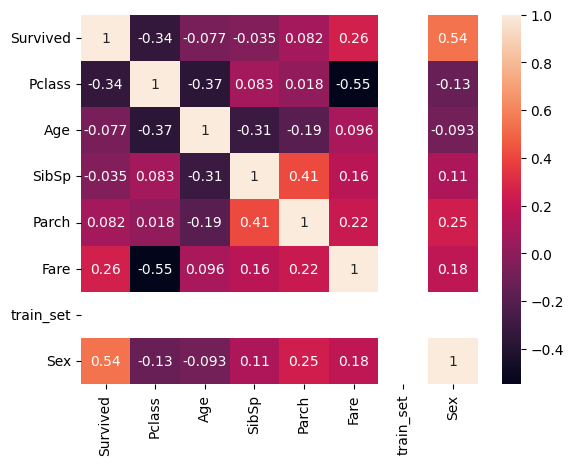

In [456]:
heatmap_df = train
heatmap_df['Sex'] = heatmap_df['Sex'].map({'female': 1, 'male':0})
numerical_columns.append('Sex')

sns.heatmap(heatmap_df[numerical_columns].corr(), annot=True)
#transform sex into numerical -> 1 = female, 0 = male. Thus, we expect to see a positive correlation between sex and survival rate

#### 2. Preprocessing the data  ####

##### 2.1. Applying all changes to train and test dataset #####

In [457]:
all_data = pd.concat([train, test], ignore_index=True)

In [458]:
#Cabin-cat: first letter of cabin 
all_data['Cabin-cat'] = all_data['Cabin'].str[0]

#drop null values in embarked
all_data.dropna(subset=['Embarked'],inplace = True)

#Fill null cabin-cat values with 0
all_data['Cabin-cat'] = all_data['Cabin-cat'].fillna(0)

#Name-cat: title 
all_data['Name-cat'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#convert pclass to str to get dummies
all_data.Pclass = all_data.Pclass.astype(str)

#fill null ages with median
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median())

#removing passengerid, cabin and name
all_data = all_data.drop(columns=['Name', 'PassengerId', 'Cabin', 'Ticket', 'Fare'])


In [465]:
#get dummies
all_dummies = pd.get_dummies(all_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'train_set', 'Cabin-cat', 'Name-cat']])

In [474]:
x_train = all_dummies[all_dummies['train_set'] == 1].drop(columns=['train_set', 'Survived'])
x_test = all_dummies[all_dummies['train_set'] == 0].drop(columns=['train_set', 'Survived'])

y_train = all_dummies[all_dummies['train_set'] == 1]['Survived']

#### 3. Building the Model  ####

In [501]:
model_name = []
model_score = []

In [502]:
gnb = GaussianNB()
cv = cross_val_score(gnb,x_train,y_train,cv=5)
print(cv.mean())

model_name.append('Naive Bayes')
model_score.append(cv.mean())

0.7255316447660763


In [503]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv.mean())

model_name.append('Logistic Regression')
model_score.append(cv.mean())

0.8279248397130704


In [504]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,x_train,y_train,cv=5)
print(cv.mean())

model_name.append('Random Forest')
model_score.append(cv.mean())

0.7930362470640513


In [505]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,x_train, y_train,cv=5)
print(cv.mean())

model_name.append('Decision Tree')
model_score.append(cv.mean())

0.7896718085444043


In [506]:
svc = SVC(probability = True)
cv = cross_val_score(svc,x_train, y_train,cv=5)
print(cv.mean())

model_name.append('SVC')
model_score.append(cv.mean())

0.654675299942868


In [507]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,x_train, y_train,cv=5)
print(cv.mean())

model_name.append('XG Boost')
model_score.append(cv.mean())

0.8211959626737764


In [508]:
df_score = pd.DataFrame()
df_score['Model'] = model_name
df_score['Score'] = model_score

df_score

,Model,Score
0,Naive Bayes,0.725532
1,Logistic Regression,0.827925
2,Random Forest,0.793036
3,Decision Tree,0.789672
4,SVC,0.654675
5,XG Boost,0.821196


#### 3.1. Making Prediction #### 

In [511]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [512]:
cv = cross_val_score(voting_clf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.8258427  0.80898876 0.79775281 0.86440678]
0.8211959626737764


In [519]:
voting_clf.fit(x_train,y_train)
y_hat_base_vc = voting_clf.predict(x_test).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)